IMPORTING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')
df


PRE-PROCESSING

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
import math
import numpy as np
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

STATISTICAL ANALYSIS

In [ ]:
m1=df.mean()
m1.plot()


In [ ]:
m2=df.median()
m2.plot()


In [ ]:
m3=df.mode()
m3.plot()

In [ ]:
q1 = df.quantile(0.25)
q1
q2 = df.quantile(0.50)
q2
q3 = df.quantile(0.75)
q3

INYER QUARTILE RANGE

In [ ]:
iqr= q3-q1
iqr
iqr.plot()

In [ ]:
ndata = df.select_dtypes(exclude='object')
ndata
cdata = df.select_dtypes(include='object')
cdata

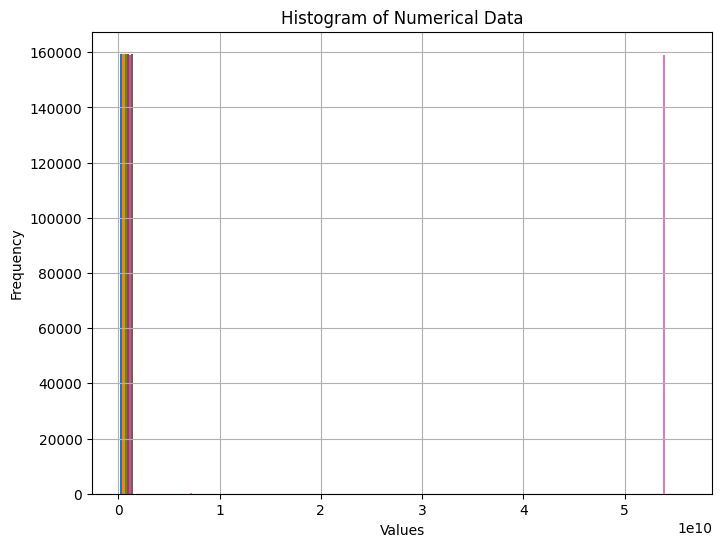

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(ndata, bins=30)
plt.title('Histogram of Numerical Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
statistics.median(df['Electric Range'])

14

SKEWESS

In [ ]:
df.skew()

In [ ]:
#Example of positive skewness
df['Electric Range'].plot(kind = 'density')



In [ ]:
df['Electric Range'].plot(kind='density')
plt.axvline(df['Electric Range'].mean(), color='red')
plt.axvline(df['Electric Range'].median(), color='green')
plt.axvline(df['Electric Range'].mode()[0], color='blue')

In [ ]:
#Example of negative skewness
df['Model Year'].plot(kind = 'density')

In [ ]:
df['Model Year'].plot(kind='density')
plt.axvline(df['Model Year'].mean(), color='red')
plt.axvline(df['Model Year'].median(), color='green')
plt.axvline(df['Model Year'].mode()[0], color='blue')

<Axes: xlabel='Electric Range', ylabel='Density'>

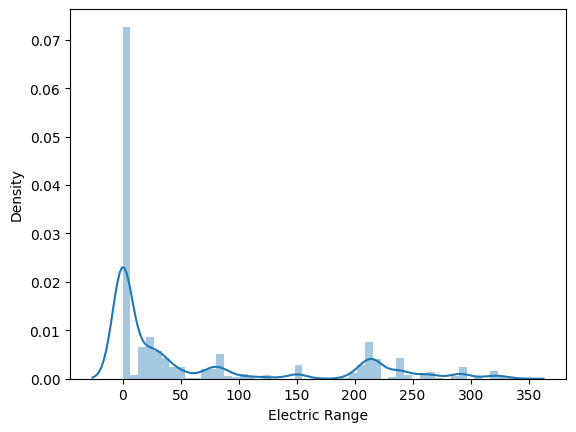

In [ ]:
df['Model Year'].mode()#Normal Distribution/Symmetric
sns.distplot(df['Electric Range'],hist=True,kde=True)

In [ ]:
sns.displot(df, x="Electric Range", hue="2020 Census Tract", kind="kde", multiple="stack")

KURTOSIS

In [ ]:
df.kurt()

Postal Code             938.653417
Model Year                0.344302
Electric Range            0.197265
Base MSRP               558.179242
Legislative District     -1.078377
DOL Vehicle ID            3.382912
2020 Census Tract       703.405678
dtype: float64

<Axes: xlabel='Electric Range', ylabel='Density'>

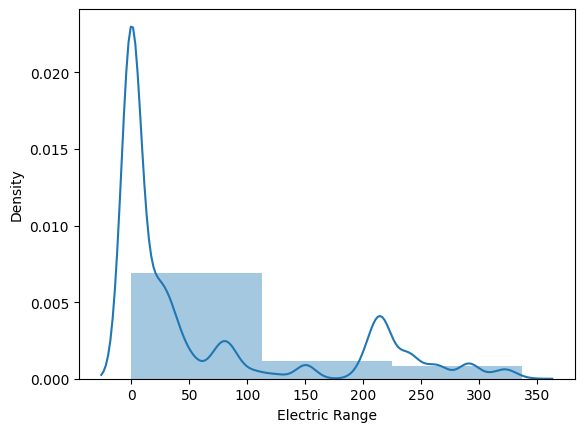

In [ ]:
import seaborn as sns
sns.distplot(df['Electric Range'], bins=3)
#for  platkyrutic distribution  use a small number of bins, such as 2 or 3.

<Axes: xlabel='Electric Range', ylabel='Density'>

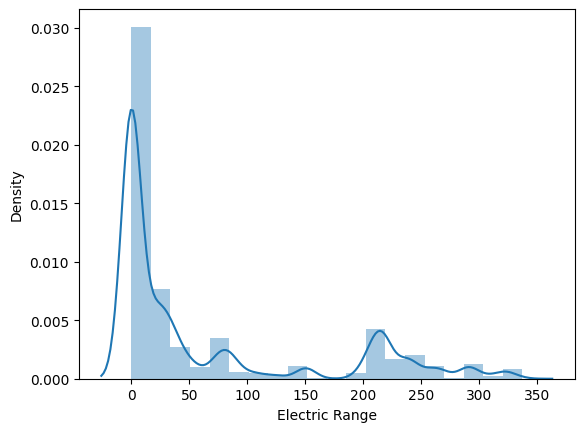

In [ ]:
import seaborn as sns
sns.distplot(df['Electric Range'], bins=20)
#for  mesokurtic distribution  use a small number of bins, such as 10 or 20

HANDLING OUTLINERS


In [ ]:
for col in ndata.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of Postal Code : 97847
range of Model Year : 27
range of Electric Range : 337
range of Base MSRP : 845000
range of Legislative District : 48
range of DOL Vehicle ID : 479250387
range of 2020 Census Tract : 54951958199


In [ ]:
percentile25 = df['Electric Range'].quantile(0.25)
percentile75 = df['Electric Range'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  84.0
25th quartile:  0.0


In [ ]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  84.0


TRIMMING

In [ ]:
upper_limit=percentile75+1.5*iqr
print("upper_limit=",upper_limit)
lower_limit=percentile25-1.5*iqr
print("lower_limit=",lower_limit)

upper_limit= 210.0
lower_limit= -126.0


In [ ]:
a1=df[df['Electric Range'] > upper_limit]
a1
a2=df[df['Electric Range'] > upper_limit].count()
a2

In [ ]:
new_df = df[df['Electric Range'] < upper_limit]
new_df.shape

(131951, 17)

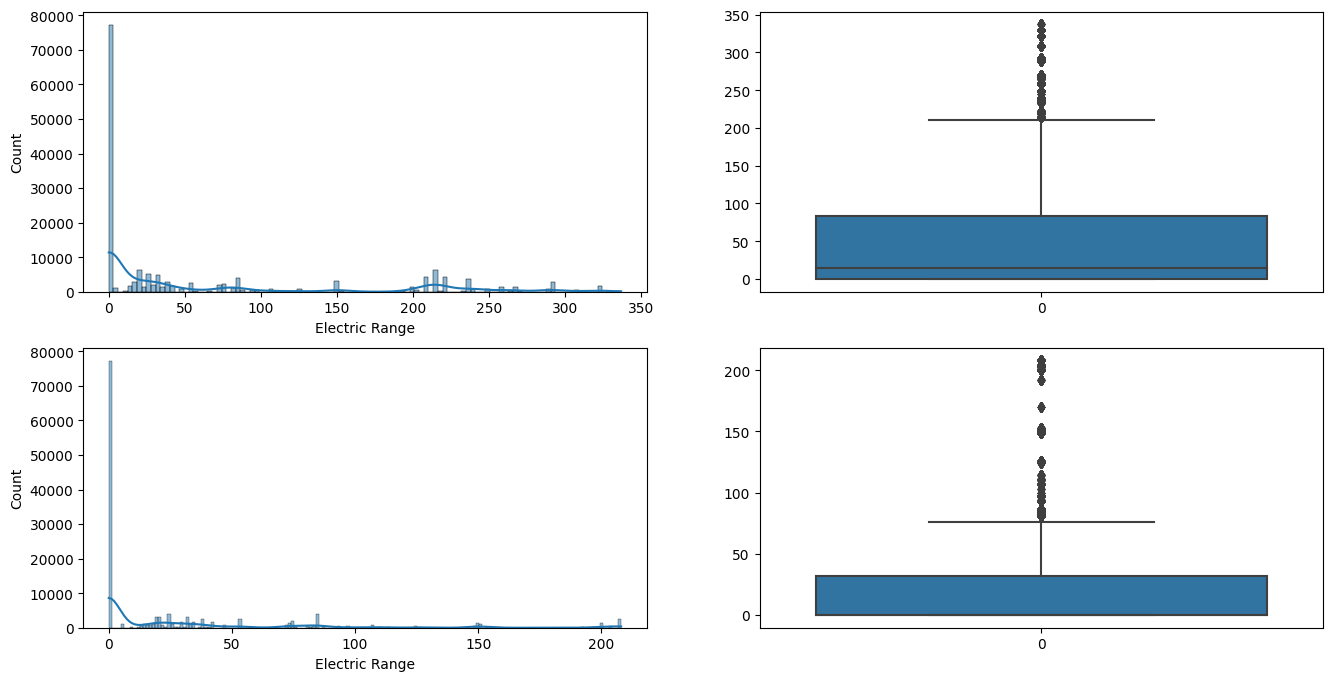

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Electric Range'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Electric Range'])

plt.subplot(2,2,3)
sns.histplot(new_df['Electric Range'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df['Electric Range'])

plt.show()

CAPPING

In [ ]:
new_df_cap = df.copy()

new_df_cap['Electric Range'] = np.where(
    new_df_cap['Electric Range'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Electric Range'] < lower_limit,
        lower_limit,
        new_df_cap['Electric Range']
    )
)

In [ ]:
new_df_cap.shape

(159467, 17)

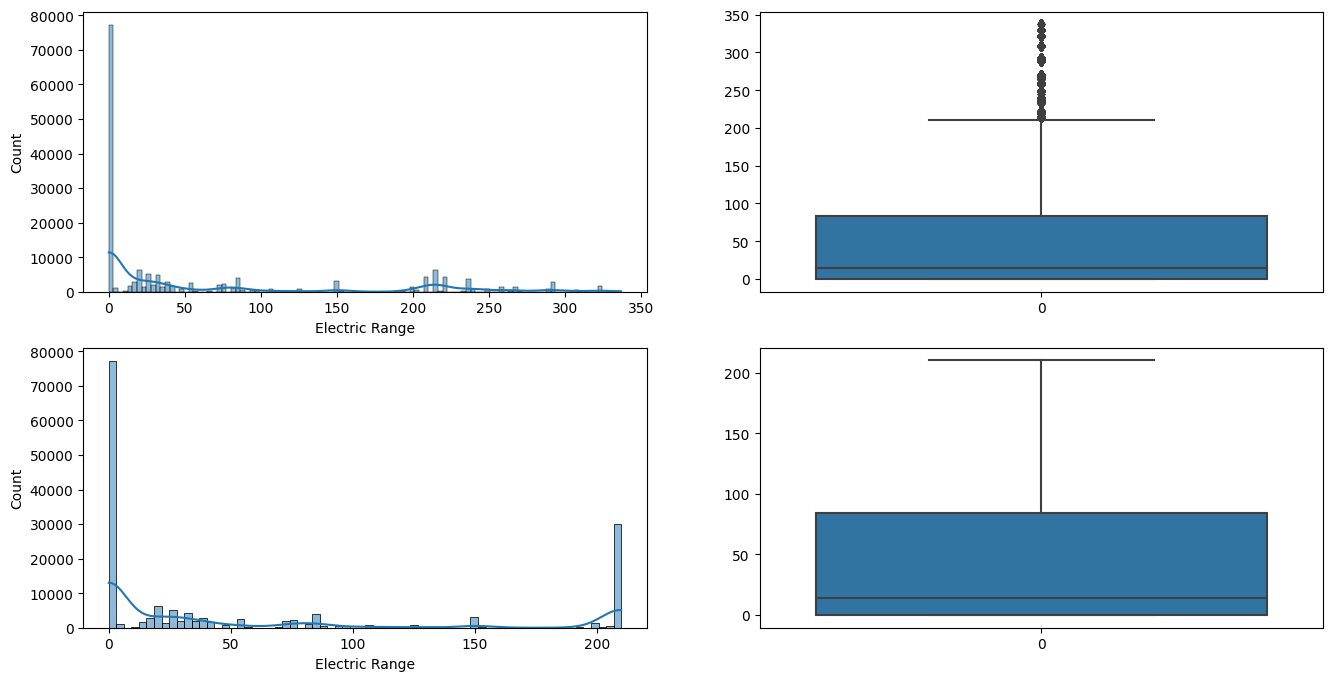

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Electric Range'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df['Electric Range'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['Electric Range'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df_cap['Electric Range'])

plt.show()